In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10

In [3]:
mnist_data=tf.keras.datasets.mnist


In [5]:
(x_train, y_train) , (x_test, y_test) = mnist_data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

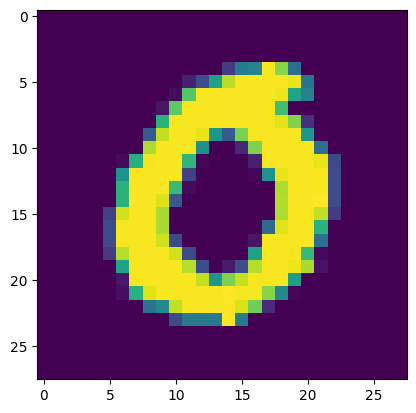

In [10]:
plt.imshow(x_train[8000])

In [12]:
y_train[8000]

0

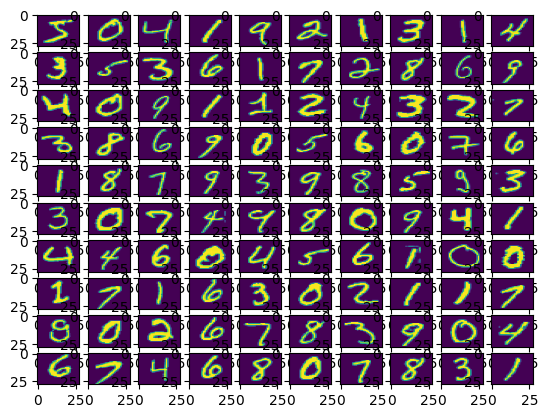

In [15]:
fig,ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28,28), aspect = 'auto')
        k += 1
plt.show()

In [31]:
x_train = x_train/255
x_test = x_test/255

In [32]:
x_train[900]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [33]:
model = Sequential()
#input layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#hidden layer
model.add(tf.keras.layers.Dense(32,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(64,activation=tf.keras.activations.relu))
#output layer 
model.add(tf.keras.layers.Dense(10 , activation=tf.keras.activations.softmax))

c:\Users\Ahmed Ashraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [35]:
model_history=model.fit(x_train , y_train , epochs=5 , validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.4337 - loss: 1.5391 - val_accuracy: 0.7993 - val_loss: 0.6496
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.7965 - loss: 0.6450 - val_accuracy: 0.8594 - val_loss: 0.4701
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.8562 - loss: 0.4835 - val_accuracy: 0.8786 - val_loss: 0.4037
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.8730 - loss: 0.4280 - val_accuracy: 0.8925 - val_loss: 0.3605
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8938 - loss: 0.3664 - val_accuracy: 0.8957 - val_loss: 0.3319


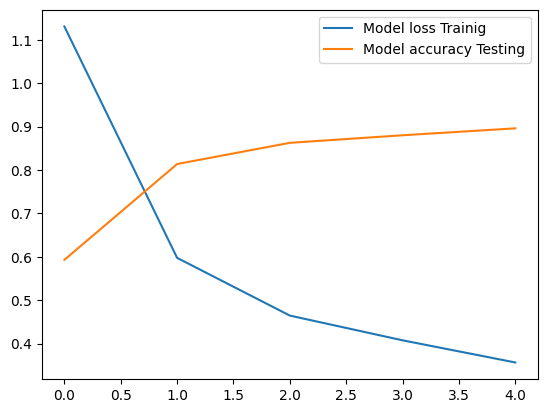

In [36]:
plt.plot(model_history.history['loss'] , label='Model loss Trainig')
plt.plot(model_history.history['accuracy'] , label ='Model accuracy Testing')
plt.legend()
plt.show()

# Example 2

In [37]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [38]:
x_train.shape

(50000, 32, 32, 3)

In [39]:
y_train.shape

(50000, 1)

In [40]:
x_test.shape

(10000, 32, 32, 3)

In [41]:
y_test.shape

(10000, 1)

In [45]:
classes = len(np.unique(y_train))
classes

10

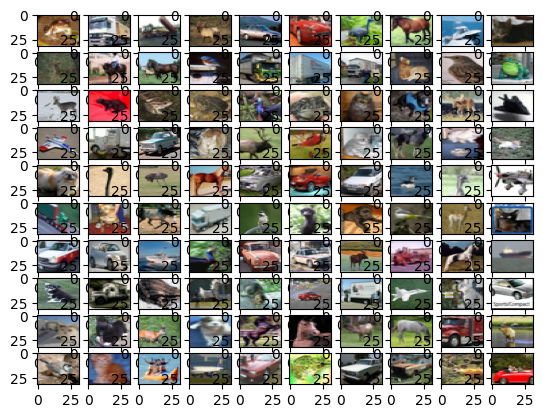

In [42]:
fig,ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k], aspect = 'auto')
        k += 1
plt.show()

In [43]:
y_train[10]

array([4], dtype=uint8)

In [46]:
from keras.utils import to_categorical
y_train = to_categorical(y_train , classes)
y_test = to_categorical(y_test , classes )

In [47]:
import cv2
def resize_images(img):
    number_images = img.shape[0]
    new_image = np.zeros((number_images, 48,48,3))
    for i in range(number_images):
        new_image[i] = cv2.resize(img[i, :, :, :], (48,48))
    return new_image

In [48]:
x_train = resize_images(x_train)
x_test = resize_images(x_test)

In [49]:
x_train.shape

(50000, 48, 48, 3)

In [51]:
x_test.shape

(10000, 48, 48, 3)

In [52]:
model = Sequential()

#input layer
model.add(tf.keras.layers.Flatten())

#hidden layers
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.keras.activations.relu))

#output layer
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax))

In [53]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [54]:
model_hist = model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1725 - loss: 122.8492 - val_accuracy: 0.0975 - val_loss: 2.3154
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1021 - loss: 2.3051 - val_accuracy: 0.0980 - val_loss: 2.3099
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3108
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.1025 - val_loss: 2.3110
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3068
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0953 - val_loss: 2.3101
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1015 - loss: 2.3028 - val_accuracy: 0.0980 - val_loss: 2.3066
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0976 - loss: 2.3028 

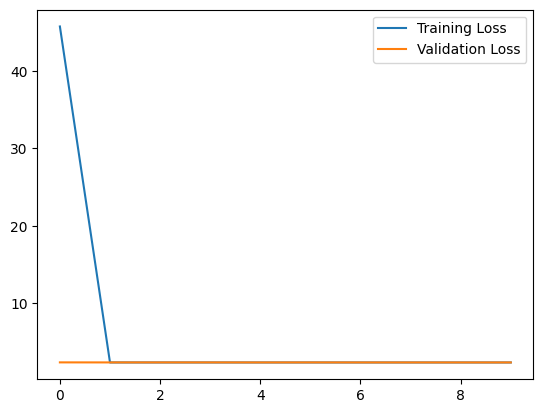

In [55]:
plt.plot(model_hist.history['loss'], label = 'Training Loss')
plt.plot(model_hist.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

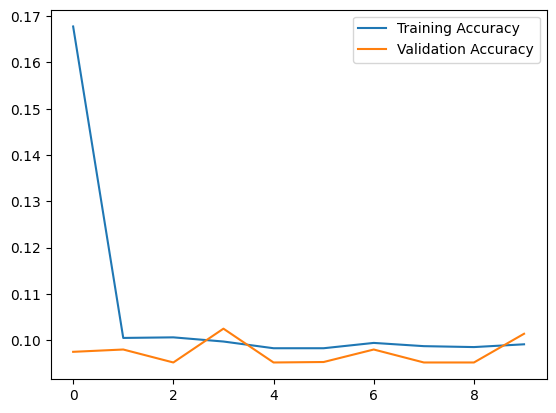

In [56]:
plt.plot(model_hist.history['accuracy'], label = 'Training Accuracy')
plt.plot(model_hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()